# Week 7 Pre-Class Assessment

This week, we will be exploring the use of fourier transforms to decompose different time-scales of variability in time series data.

As an introduction, we will go over some of the basics of fourier series and fourier transform.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',size=16,weight='bold')

The fourier series for a square wave is

$$y(t) = \frac{4}{\pi} \sum^{\infty}_{k=1,3,...odd} \frac{1}{k}\sin \left(\frac{2k\pi t}{T} \right)$$

Let's write a function to calculate this square wave for given parameters, N, T and sampling_rate

In [4]:
def square_wave(N,T,sampling_rate):
    #define time variable given sampling rate
    t = np.linspace(-4*np.pi,4*np.pi,sampling_rate)
    y = np.zeros(sampling_rate)
    for k in np.arange(1,N+1,2):
        y = y + ((4.0/(np.pi*k)) * np.sin(2*k*np.pi*t/T))
    
    #plot result
    plt.figure(figsize=(10,5))
    plt.plot(t,y)
    plt.xlim(-4*np.pi,4*np.pi)
    plt.xticks(np.arange(-4*np.pi,5*np.pi,np.pi),["-4$\pi$","-3$\pi$",
                                                  "-3$\pi$","-$\pi$","0","$\pi$","2$\pi$","3$\pi$","4$\pi$"])
    plt.axhline(0,color='k')
    plt.title('Square Wave (N = ' + str(N) + ')',fontsize=14)
    
    return y

What do we get for N = 1, T = 2$\pi$ and sampling_rate = 500?

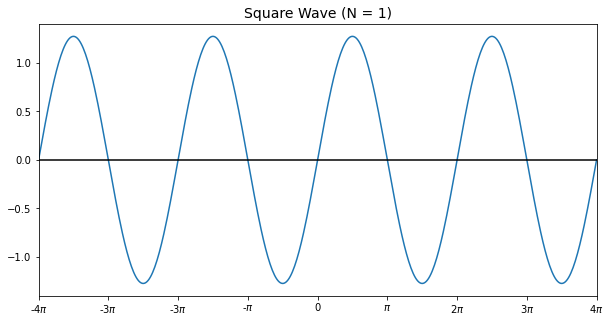

In [5]:
y = square_wave(N=1,T=2*np.pi,sampling_rate=500)

What do we get for N = 3, T = 2$\pi$ and sampling_rate = 500?

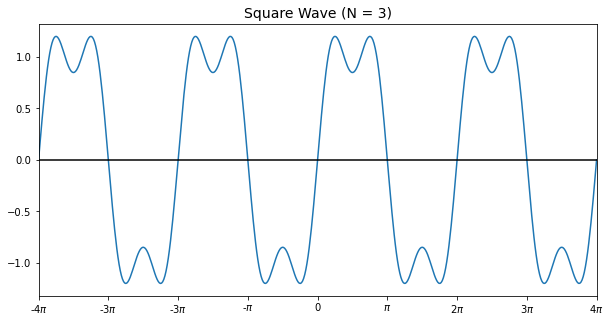

In [6]:
y = square_wave(N=3,T=2*np.pi,sampling_rate=500)

What do we get for N = 5, T = 2$\pi$ and sampling_rate = 500?

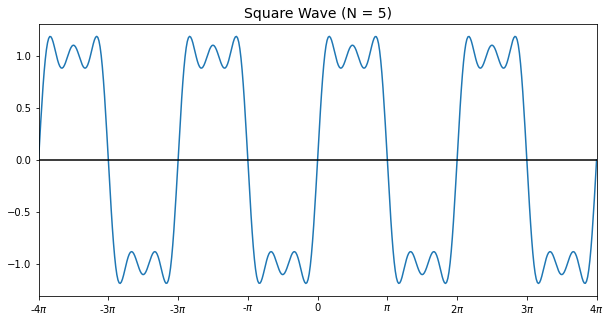

In [7]:
y = square_wave(N=5,T=2*np.pi,sampling_rate=500)

You can start to see that our square wave will emerge from the sum of many harmonic components. 

Now, write down a function that plots each fourier component of this square wave independently on the same plot and also plots the sum of the components. You should be able to modify the function above, in part, by moving the plotting command inside the loop.

Include a label for each component and the sum shown in a legend.

Just to confirm that we end up with a square wave for large values of N, try N=5000:

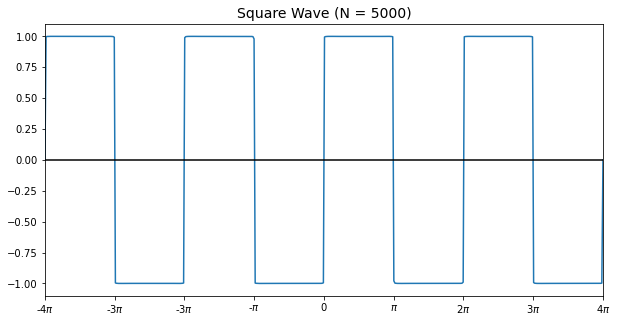

In [8]:
y = square_wave(N=5000,T=2*np.pi,sampling_rate=500)

In [9]:
def square_wave_harmonics(N,T,sampling_rate):
    #define time variable given sampling rate
    t = np.linspace(-4*np.pi,4*np.pi,sampling_rate)
    y = np.zeros(sampling_rate)
    plt.figure(figsize=(10,5))
    for k in np.arange(1,N+1,2):
        y_tmp = ((4.0/(np.pi * k)) * np.sin(2*k*np.pi*t/T))
        #plot each component
        plt.plot(t,y_tmp,label="k = " + str(k))
        plt.xlim(-4*np.pi,4*np.pi)
        plt.xticks(np.arange(-4*np.pi,5*np.pi,np.pi),["-4$\pi$","-3$\pi$",
                                                  "-3$\pi$","-$\pi$","0","$\pi$","2$\pi$","3$\pi$","4$\pi$"])
        plt.axhline(0,color='k')
        plt.title('Square Wave Harmonic Components (k = ' + str(k) + ', N = ' + str(N) + ')',fontsize=14)
        
        y = y + y_tmp
        
    #plot sum
    plt.plot(t,y,label= "Fourier Sum")
    plt.xlim(-4*np.pi,4*np.pi)
    plt.xticks(np.arange(-4*np.pi,5*np.pi,np.pi),["-4$\pi$","-3$\pi$",
                                                  "-3$\pi$","-$\pi$","0","$\pi$","2$\pi$","3$\pi$","4$\pi$"])
    plt.axhline(0,color='k')
    plt.title('Square Wave (N = ' + str(N) + ')',fontsize=14)
    plt.legend()
    
    return y

Run your function for N = 10, T = 2$\pi$ and sampling_rate = 500

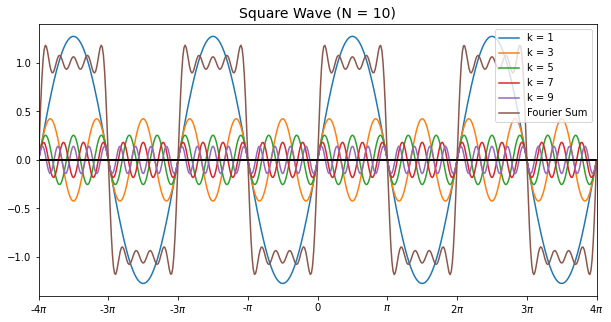

In [10]:
y = square_wave_harmonics(N=10,T=2*np.pi,sampling_rate=500)

We can see from the figure of all the harmonic components that they all have different frequencies and ampltidues. These frequencies and amplitudes are what the fourier transform allows us to quantify for any time series.

What is the frequency for each of the harmonic components assuming that T is in units of seconds (T = 2$\pi$)?

In [11]:
N = 10; T = 2*np.pi
for k in np.arange(1,N+1,2):
    f = k/T
    print(f, 'Hz')

0.15915494309189535 Hz
0.477464829275686 Hz
0.7957747154594768 Hz
1.1140846016432675 Hz
1.432394487827058 Hz


Let's see how these would look if we plotted them in amplitude-frequency space. 

But, what is the amplitude? Take a look at the equation at the beginning - what relative contribution does each harmonic component have? This is the amplitude.

Make a bar plot of amplitude versus frequency for N = 10. This 

Text(0, 0.5, 'Amplitude')

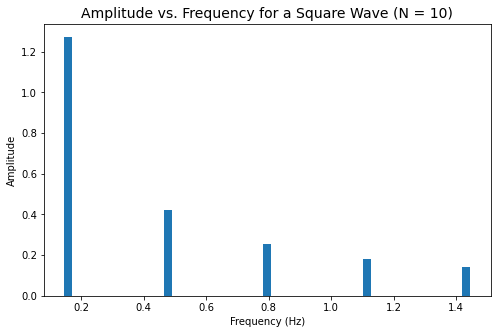

In [13]:
N = 10; T = 2*np.pi; f = []; amp = []
for k in np.arange(1,N+1,2):
    f.append(k/T)
    amp.append(4/(np.pi*k))
    

plt.figure(figsize=(8,5))
plt.bar(f,amp,width=0.025)
plt.title('Amplitude vs. Frequency for a Square Wave (N = 10)',fontsize=14)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

In [23]:
def square_wave(N,T,sampling_rate):
    #define time variable given sampling rate
    t = np.linspace(-4*np.pi,4*np.pi,sampling_rate)
    y = np.zeros(sampling_rate)
    for k in np.arange(1,N+1,2):
        y = y + 4.0/(np.pi*k)*np.sin(2*k*np.pi*t/T)
        
        if k == 1:
            yk1 = y
    
    #plot result
    plt.figure(figsize=(10,5))
    plt.plot(t,y)
    plt.xlim(-4*np.pi,4*np.pi)
    plt.xticks(np.arange(-4*np.pi,5*np.pi,np.pi),["-4$\pi$","-3$\pi$",
                                                  "-3$\pi$","-$\pi$","0","$\pi$","2$\pi$","3$\pi$","4$\pi$"])
    plt.axhline(0,color='k')
    plt.title('Square Wave (N = ' + str(N) + ')',fontsize=14)
    
    return y, yk1, t

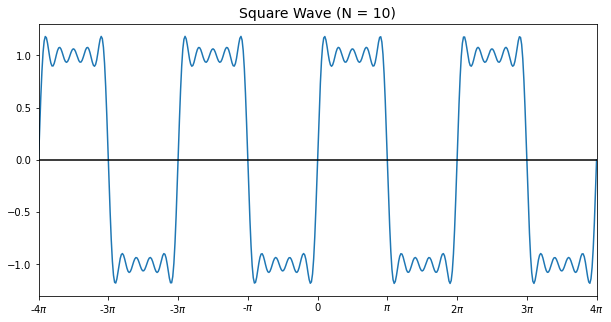

In [30]:
y,yk1,t = square_wave(N=10,T=2*np.pi,sampling_rate=500)

In [31]:
#  compute variance as a function of f
t = np.arange(0,len(y))
k_all = np.arange(1,len(y)/2+1)
ck2 = []
for i in k_all:
    T = float(len(y))
    k = i
    theta = 2*np.pi*t*k/T
    
    coskd = np.cos(theta)
    sinkd = np.sin(theta)
    
    ak = y*coskd
    bk = y*sinkd

    ak_mean = np.mean(ak)*2
    bk_mean = np.mean(bk)*2
    
    #Use the Pythagorean Theorem to convert to amplitude and phase format
    ck2.append((ak_mean**2 + bk_mean**2)/2)
ck22 = np.asarray(ck2)

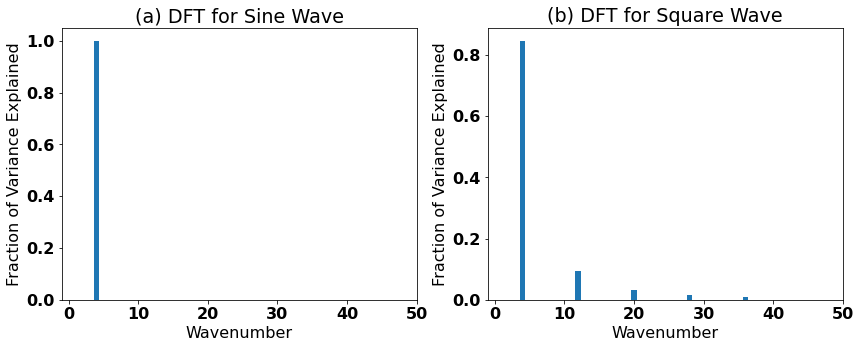

In [35]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.bar(k_all,ck21/np.sum(ck21))
plt.title("(a) DFT for Sine Wave")
plt.ylabel("Fraction of Variance Explained")
plt.xlabel("Wavenumber")
plt.xlim(-1,50)
plt.subplot(1,2,2)
plt.bar(k_all,ck22/np.sum(ck22))
plt.xlim(-1,50)
plt.title("(b) DFT for Square Wave")
plt.ylabel("Fraction of Variance Explained")
plt.xlabel("Wavenumber")
plt.savefig("DFTs.png")